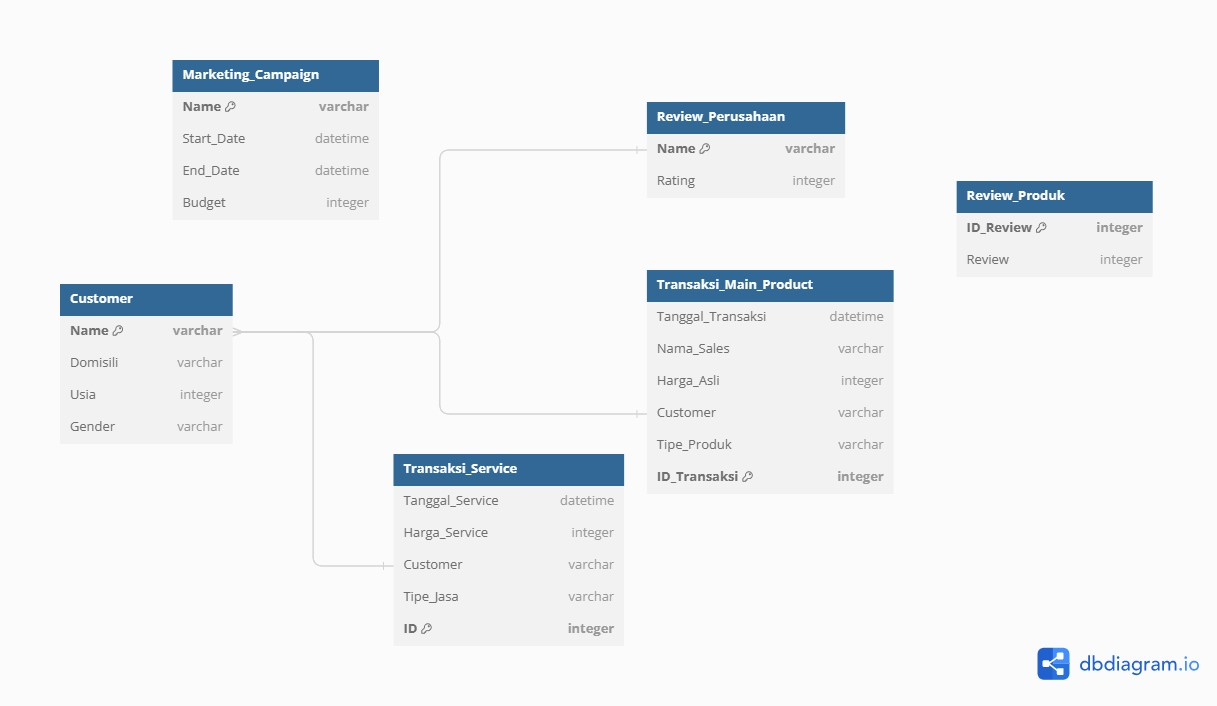

In [577]:
import pandas as pd
import sqlite3

df = pd.read_csv('Customer.csv')
df_MC = pd.read_csv('Marketing_Campaign.csv')
df_RP = pd.read_csv('Review_Perusahaan.csv')
df_produk = pd.read_csv('Review_Produk.csv')
df_TMP = pd.read_csv('Transaksi_Main_Product.csv')
df_TS = pd.read_csv('Transaksi_Service.csv')

In [578]:
df_MC['Start_Date'] = pd.to_datetime(df_MC['Start_Date'])
df_MC['End_Date'] = pd.to_datetime(df_MC['End_Date'])

df_TMP['Tanggal_Transaksi'] = pd.to_datetime(df_TMP['Tanggal_Transaksi'])
df_TS['Tanggal_Service'] = pd.to_datetime(df_TS['Tanggal_Service'])

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_9660\1613228459.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_MC['End_Date'] = pd.to_datetime(df_MC['End_Date'])
C:\Users\Zenbook\AppData\Local\Temp\ipykernel_9660\1613228459.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_TMP['Tanggal_Transaksi'] = pd.to_datetime(df_TMP['Tanggal_Transaksi'])
C:\Users\Zenbook\AppData\Local\Temp\ipykernel_9660\1613228459.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_TS['Tanggal_Service'] = pd.to_datetime(df_TS['Tanggal_Service'])


In [579]:
# Connect to a SQLite database
conn = sqlite3.connect('my_database.db')

# Define a list of DataFrames and their corresponding table names
dataframes = [
    (df, 'Customer'),
    (df_MC, 'Marketing_Campaign'),
    (df_RP, 'Review_Perusahaan'),
    (df_produk, 'Review_Produk'),
    (df_TMP, 'Transaksi_Main_Product'),
    (df_TS, 'Transaksi_Service')
]

# Write each DataFrame to the SQLite database
for dataframe, table_name in dataframes:
    dataframe.to_sql(table_name, conn, index=False, if_exists='replace')


# 1. Total Transaksi dan Revenue Product

In [589]:
# Total Transaksi dan Revenue Product

import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

query = """
    select  Customer,
            count(ID_Transaksi) as Total_Transaksi,
            sum(Harga_Asli) as Revenue
    from Transaksi_Main_Product

    group by 1
    order by 2 desc
    limit 5;
"""
result = pd.read_sql_query(query, conn)
result['Revenue'] = result['Revenue'].apply(lambda x: '{:,.0f}'.format(x)) # Biar formatnya lebih enak dibaca

# Print the result
result

,Customer,Total_Transaksi,Revenue
0,Mygneo,16,"25,063,607"
1,Bzayan,16,"23,433,536"
2,Tichaona,13,"18,625,850"
3,Nah,13,"13,131,280"
4,Thauzhash,12,"15,431,500"


In [587]:
# Total Transaksi dan Revenue Product

import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

query = """
    select  Customer.Name,
            count(Transaksi_Main_Product.Harga_Asli) as Total_Transaksi,
            sum(Transaksi_Main_Product.Harga_Asli) as Revenue
    from Customer
    
    join Transaksi_Main_Product on Customer.Name = Transaksi_Main_Product.Customer
    group by 1
    order by 3 desc
    limit 5;
"""
result = pd.read_sql_query(query, conn)
result['Revenue'] = result['Revenue'].apply(lambda x: '{:,.0f}'.format(x)) # Biar formatnya lebih enak dibaca

# Print the result
result

,Name,Total_Transaksi,Revenue
0,Evii,10,"43,180,000"
1,Taurai,7,"38,992,000"
2,Mygneo,16,"25,063,607"
3,Ezii,8,"24,336,000"
4,Bzayan,16,"23,433,536"


# 2. Total Transaksi dan Revenue Tiap Kota

In [588]:
# Total Transaksi dan Revenue Tiap Kota

import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

query = """
    select  Customer.Domisili,
            count(Transaksi_Main_Product.ID_Transaksi) as Total_Transaksi,
            sum(Transaksi_Main_Product.Harga_Asli) as Revenue
    from Customer
    
    join Transaksi_Main_Product on Customer.Name = Transaksi_Main_Product.Customer
    group by 1
    order by 3 desc
    limit 5;
"""
result = pd.read_sql_query(query, conn)
result['Revenue'] = result['Revenue'].apply(lambda x: '{:,.0f}'.format(x)) # Biar formatnya lebih enak dibaca

# Print the result
result

,Domisili,Total_Transaksi,Revenue
0,Jawa Barat,142,"201,680,015"
1,Jakarta,109,"165,696,590"
2,Bali,94,"118,282,433"
3,Luar Indonesia,96,"104,670,811"


# 3. Total Revenue Produk + Service Tiap Bulan

In [591]:
# Total Revenue Product + Service Tiap Bulan

import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

query = """
    with Gabung as (
        select Tanggal_Transaksi as Tgl, Harga_Asli as Price
        from Transaksi_Main_Product
        union
        select Tanggal_Service as Tgl, Harga_Service as Price
        from Transaksi_Service
    )
    select
        strftime('%m', Tgl) AS month,
        SUM(Price) AS Revenue
    from Gabung
    group by 1
    order by 1;
"""
result = pd.read_sql_query(query, conn)
result['Revenue'] = result['Revenue'].apply(lambda x: '{:,.0f}'.format(x)) # Biar formatnya lebih enak dibaca


# Print the result
result

,month,Revenue
0,01,"47,018,032"
1,02,"40,355,712"
2,03,"99,443,390"
3,04,"104,106,685"
4,05,"65,434,630"
5,06,"89,025,749"
6,07,"63,506,222"
7,08,"32,454,600"
8,09,"37,138,820"
9,10,"13,274,000"


# 4. Produk Disukai Wanita umur 20 - 29 (top 3)

In [593]:
# Top 3 Produk Disukai Wanita Umur 20 - 29

import locale

query = """
WITH Cust AS (
    SELECT Name, Usia, Gender
    FROM Customer
    WHERE Usia >= 20 AND Usia <= 29 AND Gender = 'Wanita'
)

SELECT Tipe_Produk, COUNT(Tipe_Produk) AS Jumlah
FROM Transaksi_Main_Product
WHERE Customer IN (SELECT Name FROM Cust)
GROUP BY 1
ORDER BY 2 DESC
LIMIT 3;
"""
result = pd.read_sql_query(query, conn)

# Print the result
result

,Tipe_Produk,Jumlah
0,E,19
1,D,19
2,B,13


# 5. Revenue dari Cust dengan Rating < 5 Perusahaan

In [594]:
import locale

query = """
WITH Data_cust AS (
    SELECT Customer, Harga_Service
    FROM Transaksi_Service

    union

    select Customer, Harga_Asli
    from Transaksi_Main_Product
)

select Data_cust.Customer, Data_cust.Harga_Service as Revenue
from Data_cust

join Review_Perusahaan
on Data_cust.Customer = Review_Perusahaan.Name
where Review_Perusahaan.Rating < 5
group by 1;

"""
result = pd.read_sql_query(query, conn)

# Print the result
result

,Customer,Revenue
0,Abdoul,25000
1,Ade,41000
2,Adegoke,25000
3,Axzab,8000
4,Bluaxia,25000
5,Boubacar,60000
6,Chinweuba,20000
7,Chuo,10000
8,Cuphulien,65000
9,Dejen,60000


In [595]:
# Total keuntungan service aja < 5

import locale

query = """
WITH Data_cust AS (
    SELECT Customer, Harga_Service
    FROM Transaksi_Service
)

select sum(Data_cust.Harga_Service) as Revenue
from Data_cust

join Review_Perusahaan
on Data_cust.Customer = Review_Perusahaan.Name
where Review_Perusahaan.Rating < 5;

"""
result = pd.read_sql_query(query, conn)
result['Revenue'] = result['Revenue'].apply(lambda x: '{:,.0f}'.format(x)) # Biar formatnya lebih enak dibaca

# Print the result
print(result)

      Revenue
0  43,576,586


In [596]:
# Total keuntungan produk <5
import locale

query = """
WITH Data_cust AS (
    select Customer, Harga_Asli
    from Transaksi_Main_Product
)

select sum(Data_cust.Harga_Asli) as Revenue
from Data_cust

join Review_Perusahaan
on Data_cust.Customer = Review_Perusahaan.Name
where Review_Perusahaan.Rating < 5;

"""
result = pd.read_sql_query(query, conn)
result['Revenue'] = result['Revenue'].apply(lambda x: '{:,.0f}'.format(x)) # Biar formatnya lebih enak dibaca

# Print the result
print(result)

       Revenue
0  398,735,881


In [613]:
(398735881/619023204)*100

64.41372123426895

In [598]:
# Total keuntungan semua
import locale

query = """
WITH Data_cust AS (
    SELECT Customer, Harga_Service
    FROM Transaksi_Service

    union

    select Customer, Harga_Asli
    from Transaksi_Main_Product
)

select sum(Data_cust.Harga_Service) as Revenue
from Data_cust

join Review_Perusahaan
on Data_cust.Customer = Review_Perusahaan.Name;

"""
result = pd.read_sql_query(query, conn)
result['Revenue'] = result['Revenue'].apply(lambda x: '{:,.0f}'.format(x)) # Biar formatnya lebih enak dibaca

# Print the result
print(result)

       Revenue
0  619,023,204


In [599]:
# Ini total keuntungan produk dan service < 5

import locale

query = """
WITH Data_cust AS (
    SELECT Customer, Harga_Service
    FROM Transaksi_Service

    union

    select Customer, Harga_Asli
    from Transaksi_Main_Product
)

select sum(Data_cust.Harga_Service) as Revenue
from Data_cust

join Review_Perusahaan
on Data_cust.Customer = Review_Perusahaan.Name
where Review_Perusahaan.Rating < 5;

"""
result = pd.read_sql_query(query, conn)
result['Revenue'] = result['Revenue'].apply(lambda x: '{:,.0f}'.format(x)) # Biar formatnya lebih enak dibaca

# Print the result
print(result)

       Revenue
0  428,950,467


# 5. Total Transaksi dan Revenue setiap Campaign

In [600]:
df_TMP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Tanggal_Transaksi  441 non-null    datetime64[ns]
 1   Nama_Sales         441 non-null    object        
 2   Harga_Asli         441 non-null    int64         
 3   Customer           441 non-null    object        
 4   Tipe_Produk        441 non-null    object        
 5   ID_Transaksi       441 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 20.8+ KB


In [601]:
df_MC['End_Date'] = pd.to_datetime(df_MC['End_Date'])

In [602]:
import locale
import pandas as pd

query = """
WITH Gabung AS (
    SELECT Tanggal_Transaksi as Tgl, Harga_Asli as Price
    FROM Transaksi_Main_Product
    UNION
    SELECT Tanggal_Service as Tgl, Harga_Service as Price
    FROM Transaksi_Service
)
SELECT Marketing_Campaign.name,count(Gabung.Tgl) as Transactions, sum(Gabung.price) as Revenue
from Gabung
join Marketing_Campaign on Gabung.Tgl between Marketing_Campaign.start_date and Marketing_Campaign.end_date
group by Marketing_Campaign.name;

"""

# Assuming you have a 'conn' variable defined for your database connection
result = pd.read_sql_query(query, conn)
result['Revenue'] = result['Revenue'].apply(lambda x: '{:,.0f}'.format(x))  # Biar formatnya lebih enak dibaca


# Print the result
print(result)

   Name  Transactions      Revenue
0     1           122   47,018,032
1     2           253   86,880,744
2     3           345  185,363,134
3     4           451  283,335,819
4     5           547  345,082,449
5     6           620  426,006,198
6     7           698  489,282,420


# **Exploratory Data Analysis**

In [603]:
df_TMP['month'] = df_TMP['Tanggal_Transaksi'].dt.month

# 1. Transaksi dan Revenue berdasarkan Gender

In [614]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

query = """
    SELECT Customer.Gender,
           COUNT(Transaksi_Main_Product.Harga_Asli) + COUNT(Transaksi_Service.Harga_Service) as Total_Transaksi,
           SUM(Transaksi_Main_Product.Harga_Asli) + SUM(Transaksi_Service.Harga_Service) as Total_Revenue
    FROM Customer
    LEFT JOIN Transaksi_Main_Product ON Customer.Name = Transaksi_Main_Product.Customer
    LEFT JOIN Transaksi_Service ON Customer.Name = Transaksi_Service.Customer
    GROUP BY 1
    ORDER BY Total_Transaksi DESC
    LIMIT 5;
"""
result = pd.read_sql_query(query, conn)
result['Total_Revenue'] = result['Total_Revenue'].apply(lambda x: '{:,.0f}'.format(x))  # Biar formatnya lebih enak dibaca

# Print the result
print(result)

   Gender  Total_Transaksi  Total_Revenue
0  Wanita             6686  4,574,834,003
1    Pria             2134  1,483,673,881


In [428]:
result

,Gender,Total_Transaksi,Total_Revenue
0,Wanita,6686,457483400300
1,Pria,2134,148367388100


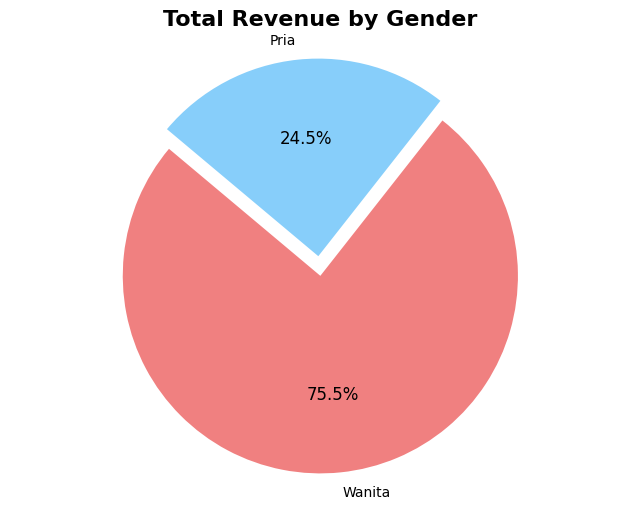

In [439]:
import matplotlib.pyplot as plt

# Plot the 'Total_Revenue' column from the 'result' DataFrame as a pie chart
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Explode the first slice (i.e., 'Wanita')

# Create the pie chart
_, _, autotexts = ax.pie(result['Total_Revenue'], labels=result['Gender'], autopct='%1.1f%%', startangle=140,
                         colors=colors, explode=explode, textprops={'color': 'black'})

ax.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle

# Add Total Revenue information next to the corresponding segments



# Customize the title
ax.set_title('Total Revenue by Gender', fontsize=16, fontweight='bold')

# Customize the autopct text
for autotext in autotexts:
    autotext.set_fontsize(12)

plt.show()

In [497]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

query = """
    SELECT Customer.Gender, Customer.Usia,
           COUNT(Transaksi_Main_Product.Harga_Asli) + COUNT(Transaksi_Service.Harga_Service) as Total_Transaksi,
           SUM(Transaksi_Main_Product.Harga_Asli) + SUM(Transaksi_Service.Harga_Service) as Total_Revenue
    FROM Customer
    LEFT JOIN Transaksi_Main_Product ON Customer.Name = Transaksi_Main_Product.Customer
    LEFT JOIN Transaksi_Service ON Customer.Name = Transaksi_Service.Customer

    where Customer.Gender = 'Wanita'

    GROUP BY 2
    ORDER BY 2 asc;
"""
result1 = pd.read_sql_query(query, conn)
result1['Total_Revenue'] = result1['Total_Revenue'].apply(lambda x: '{:,.0f}'.format(x))  # Biar formatnya lebih enak dibaca

# Print the result
print(result1)

    Gender  Usia  Total_Transaksi   Total_Revenue
0   Wanita    11              342  14,783,370,400
1   Wanita    14              180  17,315,000,000
2   Wanita    16              112   5,087,800,000
3   Wanita    17              592  48,128,745,000
4   Wanita    18              352  24,592,548,800
5   Wanita    19              288  10,055,600,000
6   Wanita    22              112   6,058,925,000
7   Wanita    23              540  51,715,348,000
8   Wanita    24              646  33,216,821,000
9   Wanita    27              602  51,365,090,800
10  Wanita    28              234  19,388,100,000
11  Wanita    30              108   6,492,600,000
12  Wanita    31              426  13,500,455,000
13  Wanita    32              192  10,688,899,200
14  Wanita    33              264  10,256,525,000
15  Wanita    35              126  35,609,028,300
16  Wanita    36              110   6,722,700,000
17  Wanita    38              120   4,202,500,000
18  Wanita    39              244   6,692,840,000


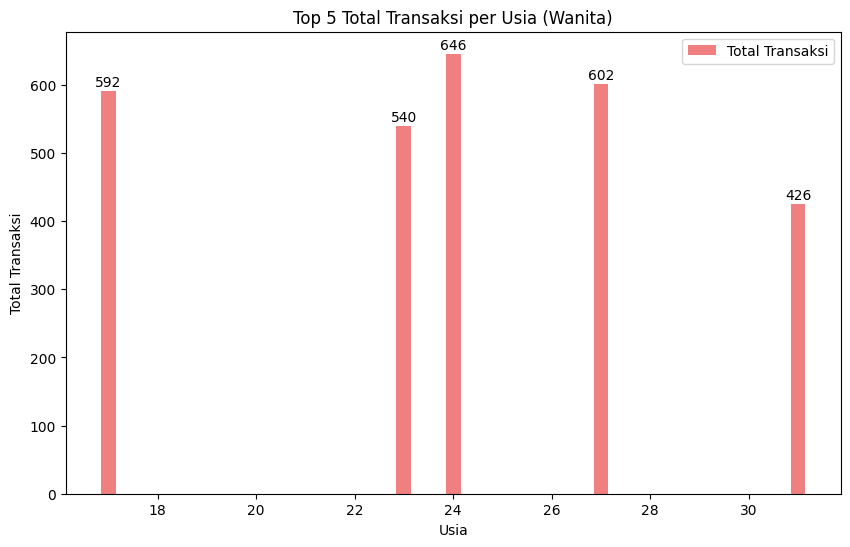

In [483]:
import matplotlib.pyplot as plt

# Plot Total Revenue
plt.figure(figsize=(10, 6))
bars = plt.bar(result1['Usia'], result1['Total_Transaksi'], color='lightcoral', label='Total Transaksi', width=0.3)

# Menambahkan label Total Transaksi di atas setiap batang
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,.0f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), 
                 textcoords="offset points", ha='center', fontsize=10, color='black')

plt.xlabel('Usia')
plt.ylabel('Total Transaksi')
plt.title('Top 5 Total Transaksi per Usia (Wanita)')
plt.legend()

plt.show()

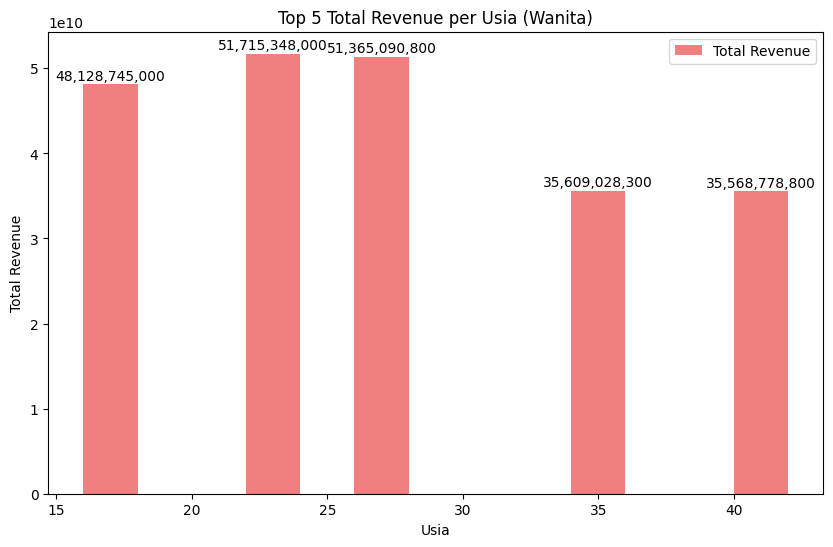

In [476]:
import matplotlib.pyplot as plt

# Plot Total Revenue
plt.figure(figsize=(10, 6))
bars = plt.bar(result1['Usia'], result1['Total_Revenue'], color='lightcoral', label='Total Revenue', width=2)

# Menambahkan label Total Revenue di atas setiap batang
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,.0f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), 
                 textcoords="offset points", ha='center', fontsize=10, color='black')

plt.xlabel('Usia')
plt.ylabel('Total Revenue')
plt.title('Top 5 Total Revenue per Usia (Wanita)')
plt.legend()

plt.show()

In [498]:
result1

,Gender,Usia,Total_Transaksi,Total_Revenue
0,Wanita,11,342,"14,783,370,400"
1,Wanita,14,180,"17,315,000,000"
2,Wanita,16,112,"5,087,800,000"
3,Wanita,17,592,"48,128,745,000"
4,Wanita,18,352,"24,592,548,800"
5,Wanita,19,288,"10,055,600,000"
6,Wanita,22,112,"6,058,925,000"
7,Wanita,23,540,"51,715,348,000"
8,Wanita,24,646,"33,216,821,000"
9,Wanita,27,602,"51,365,090,800"


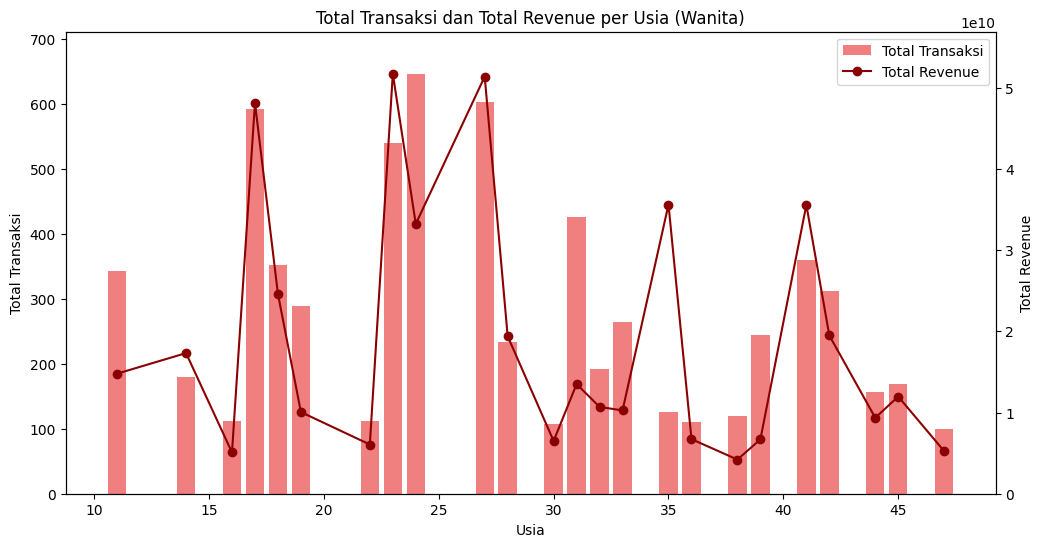

In [496]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Transaksi (ax1)
ax1.bar(result1['Usia'], result1['Total_Transaksi'], color='lightcoral', label='Total Transaksi')
ax1.set_xlabel('Usia')
ax1.set_ylabel('Total Transaksi')
ax1.tick_params(axis='y')
ax1.set_ylim(0, result1['Total_Transaksi'].max() * 1.1)

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Total Revenue (ax2)
ax2.plot(result1['Usia'], result1['Total_Revenue'], color = 'darkred',marker='o', label='Total Revenue')
ax2.set_ylabel('Total Revenue')
ax2.tick_params(axis='y')
ax2.set_ylim(0, result1['Total_Revenue'].max() * 1.1)

plt.title('Total Transaksi dan Total Revenue per Usia (Wanita)')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show()


In [515]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

query = """
    SELECT Customer.Gender, Customer.Usia,
           COUNT(Transaksi_Main_Product.Harga_Asli) + COUNT(Transaksi_Service.Harga_Service) as Total_Transaksi,
           SUM(Transaksi_Main_Product.Harga_Asli) + SUM(Transaksi_Service.Harga_Service) as Total_Revenue
    FROM Customer
    LEFT JOIN Transaksi_Main_Product ON Customer.Name = Transaksi_Main_Product.Customer
    LEFT JOIN Transaksi_Service ON Customer.Name = Transaksi_Service.Customer

    where Customer.Gender = 'Pria'

    GROUP BY 2
    ORDER BY 3 desc;
"""
result1 = pd.read_sql_query(query, conn)
result1['Total_Revenue'] = result1['Total_Revenue'].apply(lambda x: '{:,.0f}'.format(x))  # Biar formatnya lebih enak dibaca

# Print the result
print(result1)

   Gender  Usia  Total_Transaksi   Total_Revenue
0    Pria    41              270   7,400,340,000
1    Pria    29              260  19,934,300,000
2    Pria    34              256  21,460,485,600
3    Pria    36              210   3,276,578,000
4    Pria    37              204  14,551,348,000
5    Pria    48              176   9,711,878,000
6    Pria    27              168   4,224,000,000
7    Pria    20              144   8,782,458,500
8    Pria    32              140  14,625,100,000
9    Pria    19              120  26,538,000,000
10   Pria    16               84   5,521,600,000
11   Pria    28               60  10,723,200,000
12   Pria    12               42   1,618,100,000


In [516]:
result1

,Gender,Usia,Total_Transaksi,Total_Revenue
0,Pria,41,270,"7,400,340,000"
1,Pria,29,260,"19,934,300,000"
2,Pria,34,256,"21,460,485,600"
3,Pria,36,210,"3,276,578,000"
4,Pria,37,204,"14,551,348,000"
5,Pria,48,176,"9,711,878,000"
6,Pria,27,168,"4,224,000,000"
7,Pria,20,144,"8,782,458,500"
8,Pria,32,140,"14,625,100,000"
9,Pria,19,120,"26,538,000,000"


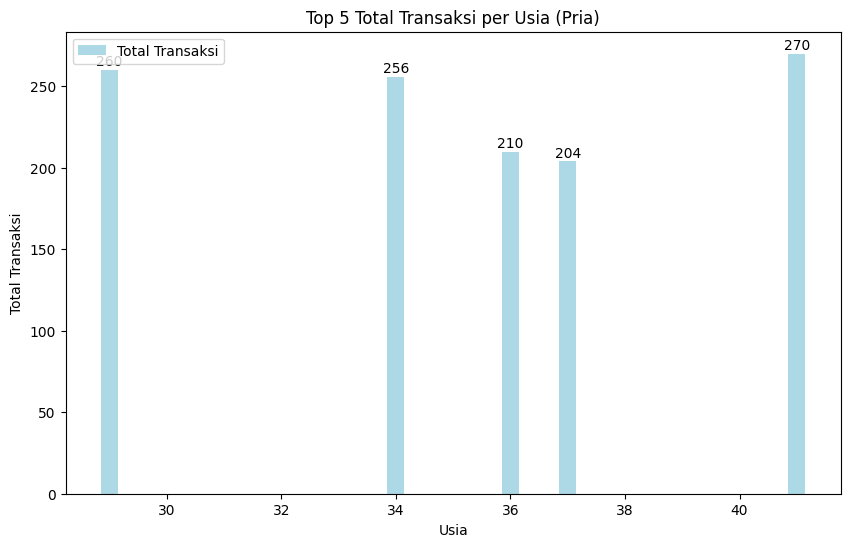

In [514]:
import matplotlib.pyplot as plt

# Plot Total Revenue
plt.figure(figsize=(10, 6))
bars = plt.bar(result1['Usia'], result1['Total_Transaksi'], color='lightblue', label='Total Transaksi', width=0.3)

# Menambahkan label Total Transaksi di atas setiap batang
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,.0f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), 
                 textcoords="offset points", ha='center', fontsize=10, color='black')

plt.xlabel('Usia')
plt.ylabel('Total Transaksi')
plt.title('Top 5 Total Transaksi per Usia (Pria)')
plt.legend()

plt.show()

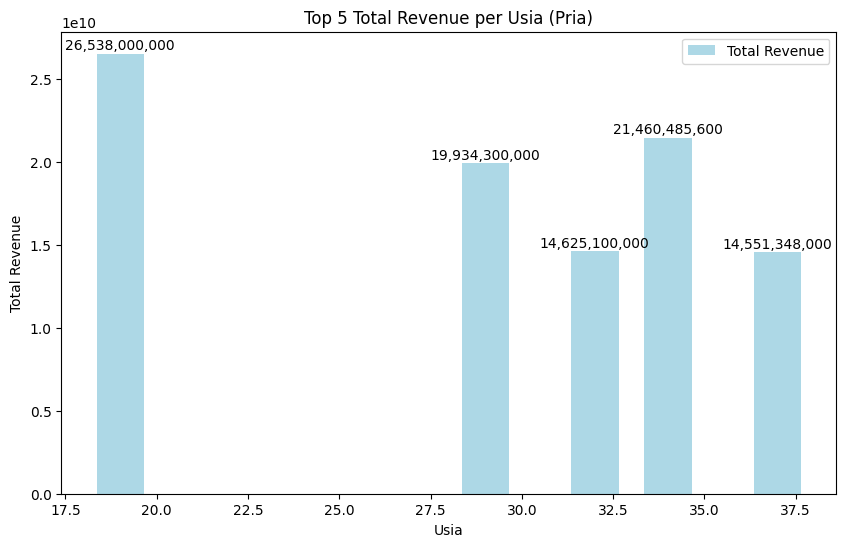

In [509]:
import matplotlib.pyplot as plt

# Plot Total Revenue
plt.figure(figsize=(10, 6))
bars = plt.bar(result1['Usia'], result1['Total_Revenue'], color='lightblue', label='Total Revenue', width=1.3)

# Menambahkan label Total Revenue di atas setiap batang
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,.0f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), 
                 textcoords="offset points", ha='center', fontsize=10, color='black')

plt.xlabel('Usia')
plt.ylabel('Total Revenue')
plt.title('Top 5 Total Revenue per Usia (Pria)')
plt.legend()

plt.show()

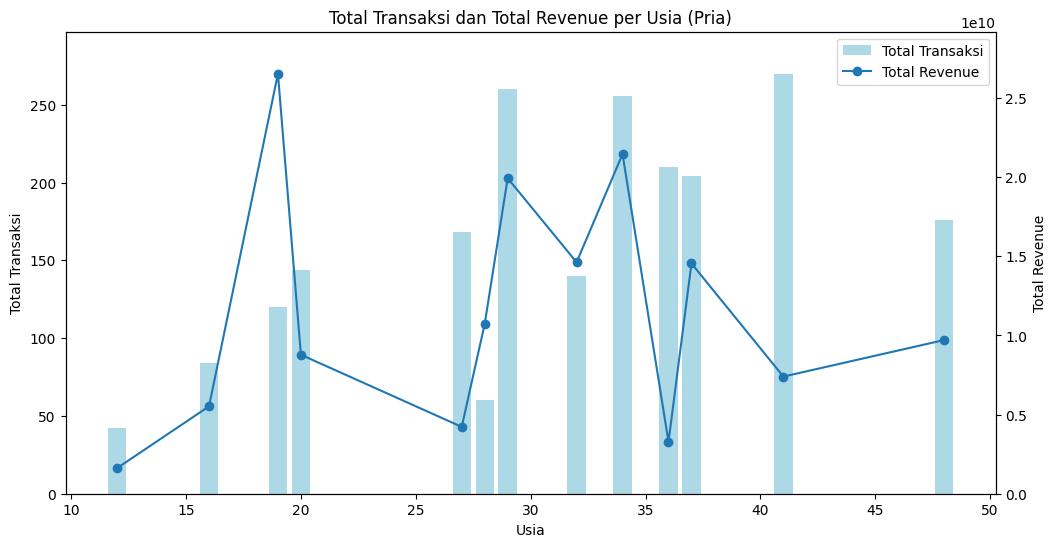

In [502]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Transaksi (ax1)
ax1.bar(result1['Usia'], result1['Total_Transaksi'], color='lightblue', label='Total Transaksi')
ax1.set_xlabel('Usia')
ax1.set_ylabel('Total Transaksi')
ax1.tick_params(axis='y')
ax1.set_ylim(0, result1['Total_Transaksi'].max() * 1.1)

# Create a second y-axis
ax2 = ax1.twinx()

# Plot Total Revenue (ax2)
ax2.plot(result1['Usia'], result1['Total_Revenue'], marker='o', label='Total Revenue')
ax2.set_ylabel('Total Revenue')
ax2.tick_params(axis='y')
ax2.set_ylim(0, result1['Total_Revenue'].max() * 1.1)

plt.title('Total Transaksi dan Total Revenue per Usia (Pria)')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show()


# 2. Transaksi dan Revenue setiap Cust

In [292]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

query = """
    SELECT Customer.Name, Customer.Gender, Customer.Usia,
           COUNT(Transaksi_Main_Product.Harga_Asli) + COUNT(Transaksi_Service.Harga_Service) as Total_Transaksi,
           SUM(Transaksi_Main_Product.Harga_Asli) + SUM(Transaksi_Service.Harga_Service) as Total_Revenue
    FROM Customer
    LEFT JOIN Transaksi_Main_Product ON Customer.Name = Transaksi_Main_Product.Customer
    LEFT JOIN Transaksi_Service ON Customer.Name = Transaksi_Service.Customer

    GROUP BY 1
    ORDER BY 5 desc;
"""
result1 = pd.read_sql_query(query, conn)
result1['Total_Revenue'] = result1['Total_Revenue'].apply(lambda x: '{:,.0f}'.format(x))  # Biar formatnya lebih enak dibaca

# Print the result
print(result1)

            Name  Gender  Usia  Total_Transaksi   Total_Revenue
0         Taurai  Wanita    35              126  35,609,028,300
1         Noshom  Wanita    27              234  27,842,198,800
2           Ezii  Wanita    23              176  27,754,800,000
3           Evii    Pria    19              120  26,538,000,000
4          Axzab  Wanita    24              380  23,876,962,000
5         Mygneo    Pria    34              256  21,460,485,600
6       Wevishar  Wanita    41              216  21,078,390,000
7           Oozu  Wanita    17              180  20,546,525,000
8         Bzayan  Wanita    18              256  20,094,348,800
9       Tichaona    Pria    29              260  19,934,300,000
10      Saazteec  Wanita    28              234  19,388,100,000
11         Kunju  Wanita    14              180  17,315,000,000
12           Nah  Wanita    23              286  15,773,138,000
13        Ekyboo  Wanita    17              216  14,724,900,000
14           Chi    Pria    32          

# 3. Informasi Kota dengan Transaksi dan Revenue

In [517]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

query = """
    SELECT Customer.Domisili,
           COUNT(Transaksi_Main_Product.Harga_Asli) + COUNT(Transaksi_Service.Harga_Service) as Total_Transaksi,
           SUM(Transaksi_Main_Product.Harga_Asli) + SUM(Transaksi_Service.Harga_Service) as Total_Revenue
    FROM Customer
    LEFT JOIN Transaksi_Main_Product ON Customer.Name = Transaksi_Main_Product.Customer
    LEFT JOIN Transaksi_Service ON Customer.Name = Transaksi_Service.Customer

    GROUP BY 1
    ORDER BY 3 desc;
"""
result1 = pd.read_sql_query(query, conn)
result1['Total_Revenue'] = result1['Total_Revenue'].apply(lambda x: '{:,.0f}'.format(x))  # Biar formatnya lebih enak dibaca

# Print the result
print(result1)

         Domisili  Total_Transaksi    Total_Revenue
0      Jawa Barat             2632  190,642,882,800
1         Jakarta             2332  180,261,413,700
2            Bali             2010  128,416,748,000
3  Luar Indonesia             1846  106,529,743,900


In [518]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

query = """
    SELECT Customer.Domisili,
           COUNT(Transaksi_Main_Product.Harga_Asli) + COUNT(Transaksi_Service.Harga_Service) as Total_Transaksi,
           SUM(Transaksi_Main_Product.Harga_Asli) + SUM(Transaksi_Service.Harga_Service) as Total_Revenue
    FROM Customer
    LEFT JOIN Transaksi_Main_Product ON Customer.Name = Transaksi_Main_Product.Customer
    LEFT JOIN Transaksi_Service ON Customer.Name = Transaksi_Service.Customer

    GROUP BY 1
    ORDER BY 3 desc;
"""
result1 = pd.read_sql_query(query, conn)

# Print the result
print(result1)

         Domisili  Total_Transaksi  Total_Revenue
0      Jawa Barat             2632   190642882800
1         Jakarta             2332   180261413700
2            Bali             2010   128416748000
3  Luar Indonesia             1846   106529743900


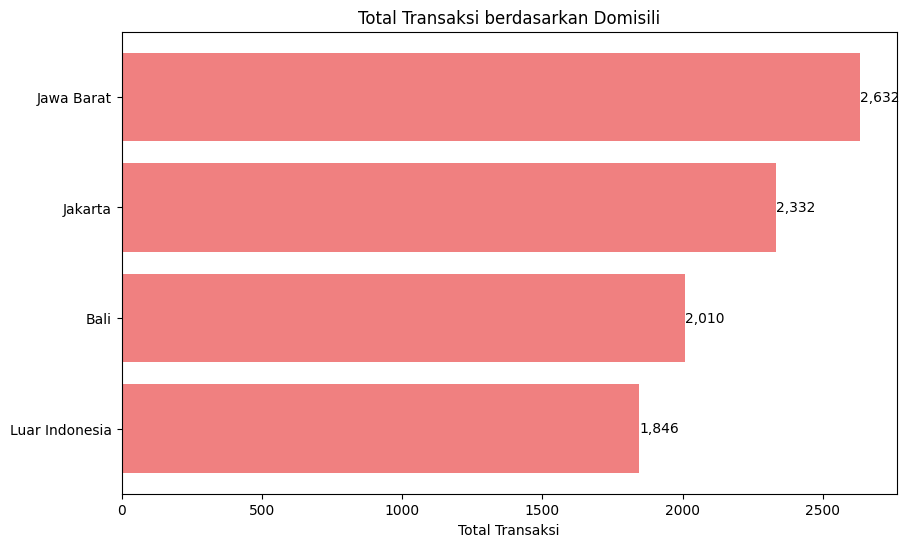

In [572]:
import matplotlib.pyplot as plt

# Data
domisili = ["Jawa Barat", "Jakarta", "Bali", "Luar Indonesia"]
total_transaksi = [2632, 2332, 2010, 1846]

# Plot grafik batang horizontal
plt.figure(figsize=(10, 6))
plt.barh(domisili, total_transaksi, color='lightcoral')
plt.xlabel('Total Transaksi')
plt.title('Total Transaksi berdasarkan Domisili')
plt.gca().invert_yaxis()  # Untuk membuat domisili urut dari atas ke bawah

# Menambahkan label Total Revenue di atas setiap bar
for i, revenue in enumerate(total_transaksi):
    plt.text(revenue, i, f'{revenue:,.0f}', va='center')

plt.show()


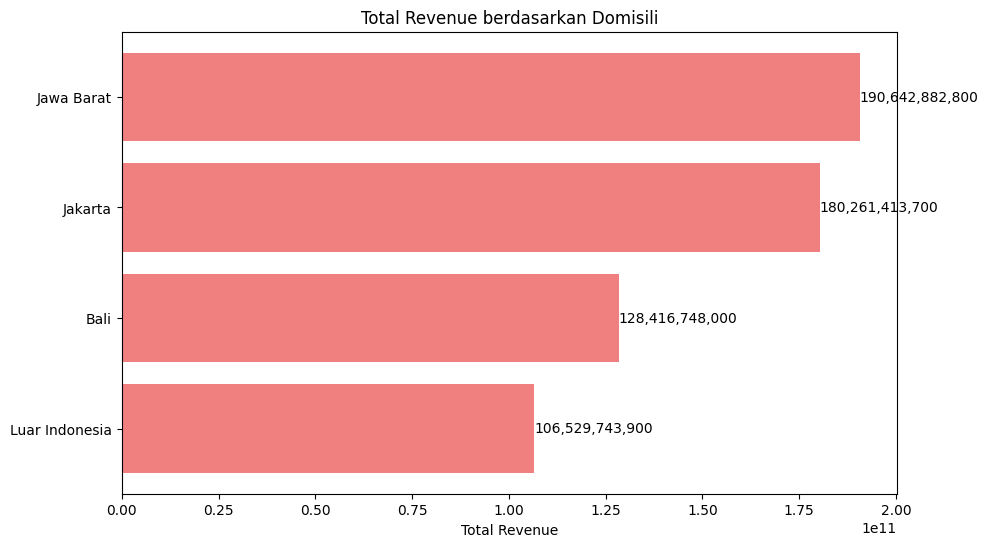

In [522]:
import matplotlib.pyplot as plt

# Data
domisili = ["Jawa Barat", "Jakarta", "Bali", "Luar Indonesia"]
total_revenue = [190642882800, 180261413700, 128416748000, 106529743900]

# Plot grafik batang horizontal
plt.figure(figsize=(10, 6))
plt.barh(domisili, total_revenue, color='lightcoral')
plt.xlabel('Total Revenue')
plt.title('Total Revenue berdasarkan Domisili')
plt.gca().invert_yaxis()  # Untuk membuat domisili urut dari atas ke bawah

# Menambahkan label Total Revenue di atas setiap bar
for i, revenue in enumerate(total_revenue):
    plt.text(revenue, i, f'{revenue:,.0f}', va='center')

plt.show()


# 4. Transaksi dan Revenue per Campaign

Udah di atas query-nya

# 5. Budget and Revenue

In [526]:
import locale
import pandas as pd

query = """
WITH Gabung AS (
    SELECT Tanggal_Transaksi as Tgl, Harga_Asli as Price
    FROM Transaksi_Main_Product
    UNION
    SELECT Tanggal_Service, Harga_Service
    FROM Transaksi_Service
)
SELECT
    CASE
        WHEN Tgl <= '2021-01-31' AND Tgl >= '2021-01-01' THEN '1'
        WHEN Tgl <= '2021-02-28' AND Tgl >= '2021-02-01' THEN '2'
        WHEN Tgl <= '2021-03-31' AND Tgl >= '2021-03-01' THEN '3'
        WHEN Tgl <= '2021-04-30' AND Tgl >= '2021-04-01' THEN '4'
        WHEN Tgl <= '2021-05-31' AND Tgl >= '2021-05-01' THEN '5'
        WHEN Tgl <= '2021-06-30' AND Tgl >= '2021-06-01' THEN '6'
        WHEN Tgl <= '2021-07-31' AND Tgl >= '2021-07-01' THEN '7'
        ELSE 'Nothing'
    END AS Campaign,
    SUM(Price) as Revenue,
    COUNT(Price) as Total
FROM Gabung
WHERE Campaign != 'Nothing'
GROUP BY Campaign;

"""

# Assuming you have a 'conn' variable defined for your database connection
result = pd.read_sql_query(query, conn)

# Print the result
print(result)

Empty DataFrame
Columns: [Campaign, Revenue, Total]
Index: []


In [369]:
df_MC

,Campaign,Start_Date,End_Date,Budget
0,1,01/01/2021,31/01/2021,"10,000,000"
1,2,01/02/2021,28/02/2021,"14,000,000"
2,3,01/03/2021,31/03/2021,"23,000,000"
3,4,01/04/2021,30/04/2021,"35,000,000"
4,5,01/05/2021,31/05/2021,"36,000,000"
5,6,01/06/2021,30/06/2021,"30,000,000"
6,7,01/07/2021,31/07/2021,"37,000,000"


In [370]:
result

,Campaign,Revenue,Total
0,1,"4,626,470,000",118
1,2,"3,704,666,200",130
2,3,"9,755,039,000",98
3,4,"10,199,168,500",116
4,5,"6,093,863,000",98
5,6,"8,471,974,900",73
6,7,"5,795,922,200",76


In [386]:
df_MC

,Name,Start_Date,End_Date,Budget
0,1,01/01/2021,31/01/2021,10000000
1,2,01/02/2021,28/02/2021,14000000
2,3,01/03/2021,31/03/2021,23000000
3,4,01/04/2021,30/04/2021,35000000
4,5,01/05/2021,31/05/2021,36000000
5,6,01/06/2021,30/06/2021,30000000
6,7,01/07/2021,31/07/2021,37000000


In [387]:
merged_data = pd.concat([df_MC, result], sort=False, axis = 1)
merged_data

,Name,Start_Date,End_Date,Budget,Campaign,Revenue,Total
0,1,01/01/2021,31/01/2021,10000000,1,"4,626,470,000",118
1,2,01/02/2021,28/02/2021,14000000,2,"3,704,666,200",130
2,3,01/03/2021,31/03/2021,23000000,3,"9,755,039,000",98
3,4,01/04/2021,30/04/2021,35000000,4,"10,199,168,500",116
4,5,01/05/2021,31/05/2021,36000000,5,"6,093,863,000",98
5,6,01/06/2021,30/06/2021,30000000,6,"8,471,974,900",73
6,7,01/07/2021,31/07/2021,37000000,7,"5,795,922,200",76


In [393]:
merged_data

,Name,Start_Date,End_Date,Budget,Revenue,Total
0,1,01/01/2021,31/01/2021,10000000,"4,626,470,000",118
1,2,01/02/2021,28/02/2021,14000000,"3,704,666,200",130
2,3,01/03/2021,31/03/2021,23000000,"9,755,039,000",98
3,4,01/04/2021,30/04/2021,35000000,"10,199,168,500",116
4,5,01/05/2021,31/05/2021,36000000,"6,093,863,000",98
5,6,01/06/2021,30/06/2021,30000000,"8,471,974,900",73
6,7,01/07/2021,31/07/2021,37000000,"5,795,922,200",76


In [530]:
merged_data

,Name,Start_Date,End_Date,Budget,Revenue,Total
0,1,01/01/2021,31/01/2021,10000000,4626470000,118
1,2,01/02/2021,28/02/2021,14000000,3704666200,130
2,3,01/03/2021,31/03/2021,23000000,9755039000,98
3,4,01/04/2021,30/04/2021,35000000,10199168500,116
4,5,01/05/2021,31/05/2021,36000000,6093863000,98
5,6,01/06/2021,30/06/2021,30000000,8471974900,73
6,7,01/07/2021,31/07/2021,37000000,5795922200,76


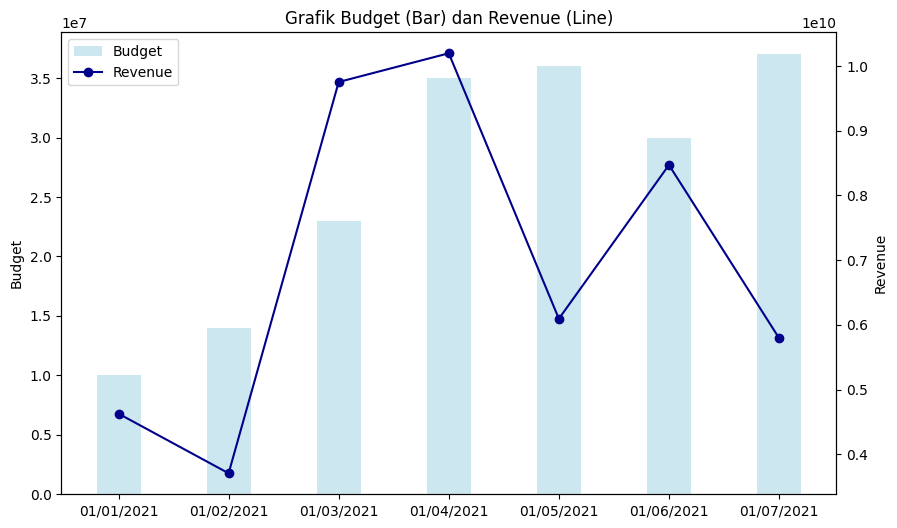

In [537]:
import matplotlib.pyplot as plt

# Data
dates = ['01/01/2021', '01/02/2021', '01/03/2021', '01/04/2021', '01/05/2021', '01/06/2021', '01/07/2021']
budget = [10000000, 14000000, 23000000, 35000000, 36000000, 30000000, 37000000]
revenue = [4626470000, 3704666200, 9755039000, 10199168500, 6093863000, 8471974900, 5795922200]

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Plot Budget as a bar on the left y-axis
ax1.bar(dates, budget, width=0.4, label='Budget', color='lightblue', alpha=0.6)
ax1.set_ylabel('Budget')

# Plot Revenue as a line on the right y-axis
ax2.plot(dates, revenue, marker='o', label='Revenue', color='darkblue')
ax2.set_ylabel('Revenue')

plt.xlabel('Tanggal')
plt.title('Grafik Budget (Bar) dan Revenue (Line)')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()


# 6. Produk dengan Penjualan Tertinggi dan Terendah

In [616]:
# Total Transaksi dan Revenue Product

import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

query = """
    SELECT Transaksi_Main_Product.Tipe_Produk,
           AVG(Review_Produk.Review) AS Rate,
           COUNT(Transaksi_Main_Product.Harga_Asli) AS Total_Transaksi,
           SUM(Transaksi_Main_Product.Harga_Asli) AS Revenue
    FROM Customer
    JOIN Transaksi_Main_Product ON Customer.Name = Transaksi_Main_Product.Customer
    JOIN Review_Produk ON Review_Produk.ID_Review = Transaksi_Main_Product.ID_Transaksi
    GROUP BY Transaksi_Main_Product.Tipe_Produk
    ORDER BY Transaksi_Main_Product.Tipe_Produk ASC;
"""
result = pd.read_sql_query(query, conn)
#result['Revenue'] = result['Revenue'].apply(lambda x: '{:,.0f}'.format(x)) # Biar formatnya lebih enak dibaca

# Print the result
print(result)

  Tipe_Produk      Rate  Total_Transaksi    Revenue
0           A  3.466667               45   66505295
1           B  3.637931               58   95393383
2           C  3.686275               51   79235480
3           D  3.612903               62   68993464
4           E  3.442857               70  103383629
5           F  3.500000               54   45260932
6           G  3.510204               49   78067955


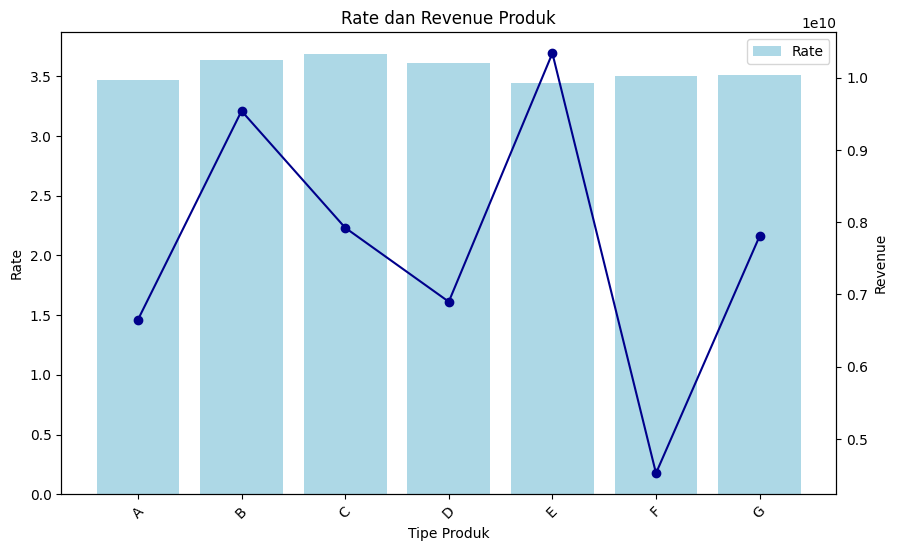

In [544]:
import matplotlib.pyplot as plt

# Data
tipe_produk = ["A", "B", "C", "D", "E", "F", "G"]
rate = [3.466667, 3.637931, 3.686275, 3.612903, 3.442857, 3.5, 3.510204]
revenue = [6650529500, 9539338300, 7923548000, 6899346400, 10338362900, 4526093200, 7806795500]

# Plot grafik batang untuk Rate
plt.figure(figsize=(10, 6))
plt.bar(tipe_produk, rate, color='lightblue', label='Rate')
plt.xlabel('Tipe Produk')
plt.ylabel('Rate')
plt.title('Rate dan Revenue Produk')
plt.xticks(rotation=45)
plt.legend()

# Create a second y-axis for Revenue
ax2 = plt.twinx()
ax2.plot(tipe_produk, revenue, marker='o', color='darkblue', label='Revenue')
ax2.set_ylabel('Revenue')


plt.show()


# 7. Service dengan Penjualan Tertinggi dan Terendah

In [545]:
# Total Transaksi dan Revenue Product

import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

query = """
    select  Transaksi_Service.Tipe_Jasa,
            avg(Review_Perusahaan.Rating) as Rating,
            count(Transaksi_Service.Harga_Service) as Total_Transaksi,
            sum(Transaksi_Service.Harga_Service) as Revenue
    from Customer
    
    join Transaksi_Service on Customer.Name = Transaksi_Service.Customer
    JOIN Review_Perusahaan ON Review_Perusahaan.Name = Transaksi_Service.Customer
    group by 1
    order by 1 asc;
"""
result = pd.read_sql_query(query, conn)
# result['Revenue'] = result['Revenue'].apply(lambda x: '{:,.0f}'.format(x)) # Biar formatnya lebih enak dibaca

# Print the result
print(result)

  Tipe_Jasa    Rating  Total_Transaksi     Revenue
0         A  3.637168              113  1118337000
1         B  3.477064              109  1042550500
2         C  3.348624              109   957528100
3         D  3.699187              123  1284985000
4         E  3.556604              106  1034634900


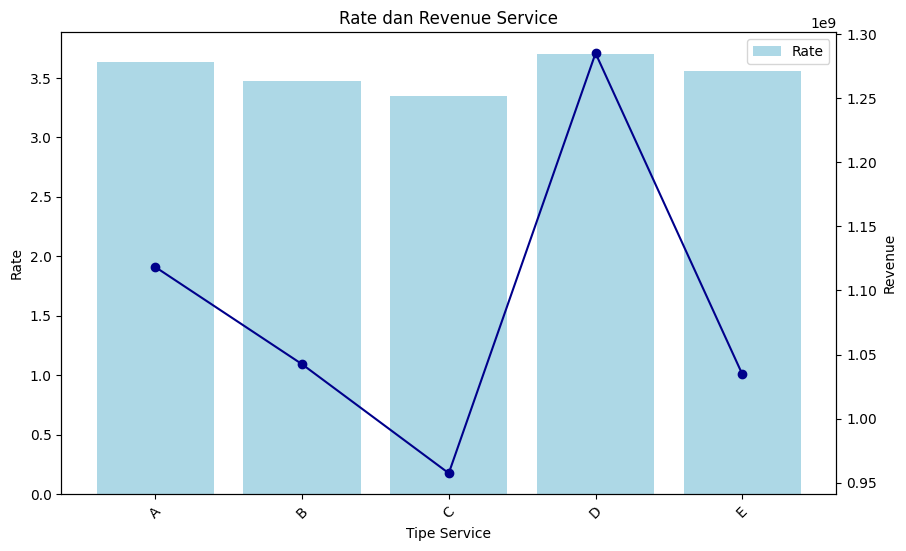

In [573]:
import matplotlib.pyplot as plt

# Data
tipe_produk = ["A", "B", "C", "D", "E"]
rate = [3.637168, 3.477064, 3.348624, 3.699187, 3.556604]
revenue = [1118337000, 1042550500, 957528100, 1284985000, 1034634900]

# Plot grafik batang untuk Rate
plt.figure(figsize=(10, 6))
plt.bar(tipe_produk, rate, color='lightblue', label='Rate')
plt.xlabel('Tipe Service')
plt.ylabel('Rate')
plt.title('Rate dan Revenue Service')
plt.xticks(rotation=45)
plt.legend()

# Create a second y-axis for Revenue
ax2 = plt.twinx()
ax2.plot(tipe_produk, revenue, marker='o', color='darkblue', label='Revenue')
ax2.set_ylabel('Revenue')


plt.show()